<font size="3"> Further we aim to explore our dataset. In view of the factors we selected for our study, we carried out several sample analyses in order to identify patterns in the development of the Spanish-language press from 1890 to 1940.</font>

<font size="3">At first we have looked at how many editions of various ideology appeared through timescale. </font> 

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
SpanishArchive= pd.read_csv ("C:/Users/xx/Desktop/Spanish papers/editions_with_text.csv", delimiter=",", encoding='utf-8')
df= SpanishArchive
editions_timescale = pd.crosstab(df['newspaper'], df['year'], margins = True)
editions_timescale.head()

year,1890,1891,1892,1893,1894,1895,1896,1898,1899,1900,...,1930,1931,1932,1934,1935,1936,1937,1938,1939,All
newspaper,,,,,,,,,,,,,,,,,,,,,
ahora,0,0,0,0,0,0,0,0,0,0,...,0,1,2,0,2,0,2,0,0,7
andalucia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
ceda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,0,0,0,0,4
el amigo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
el cantábrico,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,0,0,5


<font size="3"> Then we looked at how ideology has evolved over time </font>

In [3]:
df= SpanishArchive
editions_timescale = pd.crosstab(df['ideology'], df['year'], margins = True)
editions_timescale.head()

year,1890,1891,1892,1893,1894,1895,1896,1898,1899,1900,...,1930,1931,1932,1934,1935,1936,1937,1938,1939,All
ideology,,,,,,,,,,,,,,,,,,,,,
anarchist,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,1,6
carlist,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,7
conservative,2,2,2,0,0,0,2,0,0,0,...,2,1,2,2,2,0,0,0,0,25
democrat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
federalist,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


<font size="3"> And defined how many editions of various ideology our dataset contains </font>

In [4]:
editions_ideology = pd.crosstab(df['newspaper'], df['ideology'], margins = True)
editions_ideology

ideology,anarchist,carlist,conservative,democrat,federalist,liberal,regionalist,republican,socialist,All
newspaper,,,,,,,,,,
ahora,0,0,0,0,0,0,0,0,7,7
andalucia,0,0,0,0,0,0,5,0,0,5
ceda,0,0,4,0,0,0,0,0,0,4
el amigo,0,0,0,0,5,0,0,0,0,5
el cantábrico,0,0,0,0,0,0,0,0,5,5
el cruzado español,0,0,6,0,0,0,0,0,0,6
el imparcial,0,0,0,0,0,7,0,0,0,7
el pais,0,0,0,0,0,0,0,9,0,9
el siglo futuro,0,7,0,0,0,0,0,0,0,7


<font size="3"> Here we can observe how many editions per year have been published, the mean, max and min values of editions per years in combined statistics </font>

In [5]:
df = SpanishArchive
df[['year']].describe()

,year
count,100.000000
mean,1917.220000
std,14.977815
min,1890.000000
25%,1905.750000
50%,1918.000000
75%,1931.250000
max,1939.000000


<font size=5> VISUALISATIONS </font>

<font size=3> Let's look at which year the most newspapers and magazines were published. </font>

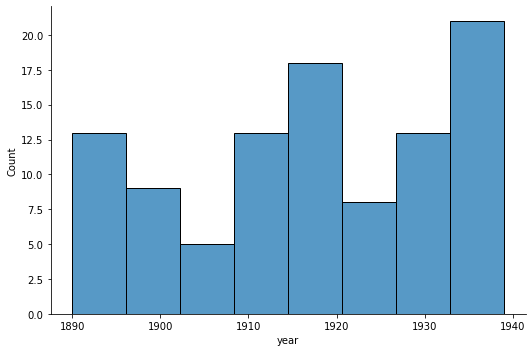

In [6]:
sns.displot(x='year', height=5,aspect=1.5, data=df)

<font size="3"> And now we can see the statistics of 'ideology' represented through years </font>

In [8]:
df_newspaper_by_years = df.groupby('ideology')['year'].sum()
df_newspaper_by_years

ideology
anarchist       11625
carlist         13393
conservative    47860
democrat        11452
federalist       9589
liberal         38324
regionalist      9582
republican      17147
socialist       32750
Name: year, dtype: int64

<font size="3"> Further on we examined the evolution of ideology through time shown in various outputs. The first graph illustrates the ratio of the ideology of the publications throughout the time period in question and in each individual period. </font>

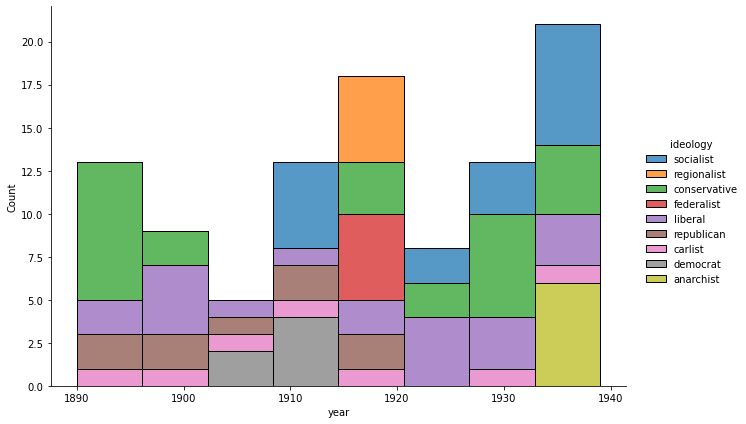

In [9]:
sns.displot(df, x ="year",hue='ideology', height=6,aspect=1.5, multiple='stack') 

<font size="3"> Another explication of the same ratio </font>

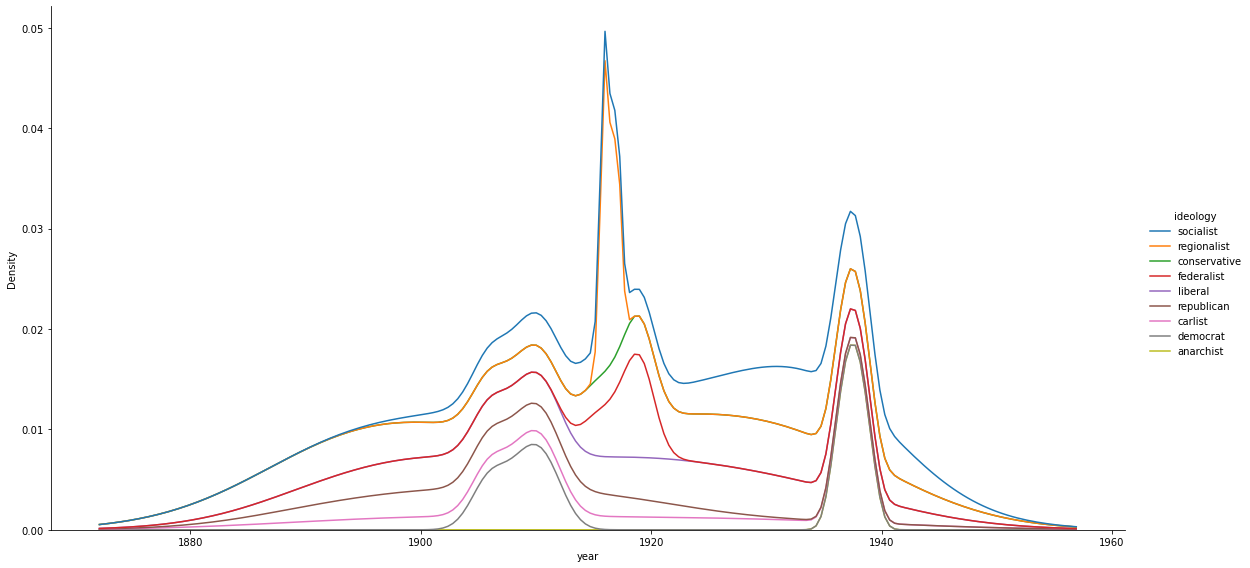

In [10]:
ax = sns.displot(df, x='year', hue='ideology',
                 kind="kde",multiple="stack", height=8,aspect=2, fill=False)

<font size="3"> The third graph shows the point presence of each ideology in a given period. </font>

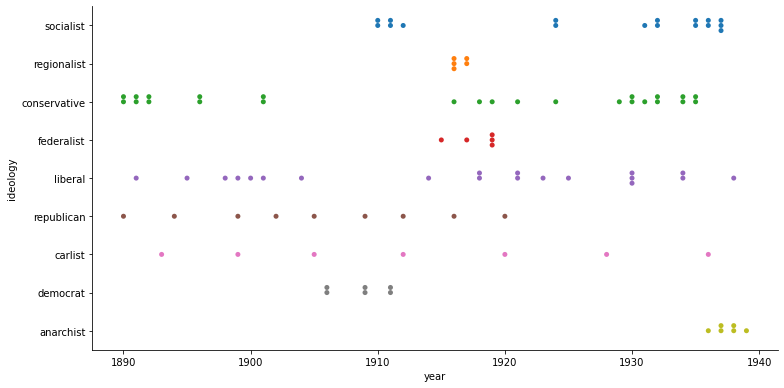

In [11]:
sns.catplot(data=df, x="year", y="ideology", height=5.5,aspect=2, kind="swarm")

<font size=3>  A series of boxplots demonstrate the other features of our dataset. The first boxplot depicts the representation of editions' format through the years </font>

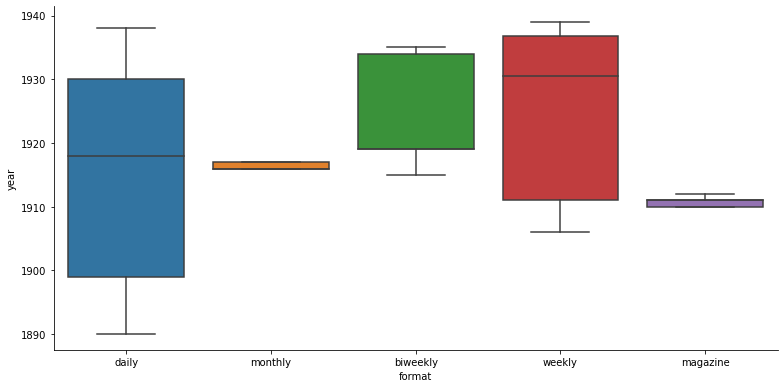

In [12]:
sns.catplot(data=df, x="format", y="year",  height=5.5,aspect=2, kind="box")

<font size="3"> The second one explains of audience types' coverage </font>

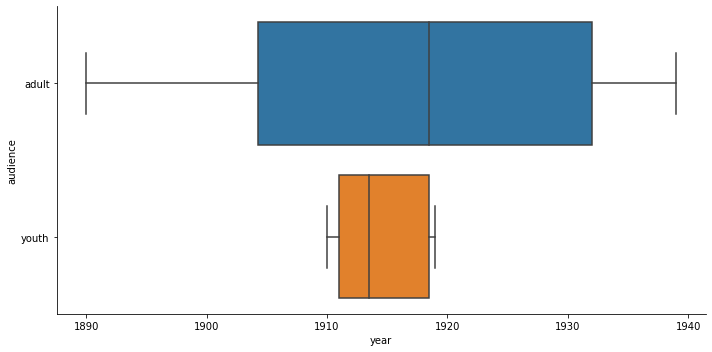

In [13]:
sns.catplot(data=df, x="year", y="audience",height=5,aspect=2, kind="box")

<font size="3"> And, we also can determine the distribution of publications on a regional basis</font>

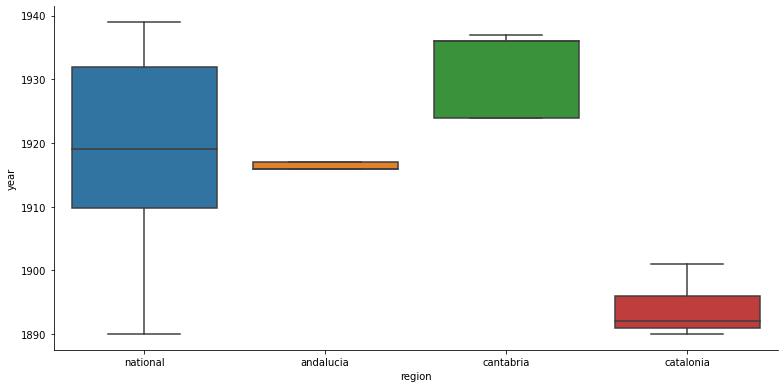

In [14]:
sns.catplot(data=df, x="region", y="year",  height=5.5,aspect=2, kind="box")

<font size="3"> Similar observations can be made when analysing the ideological distribution of individual publications </font>

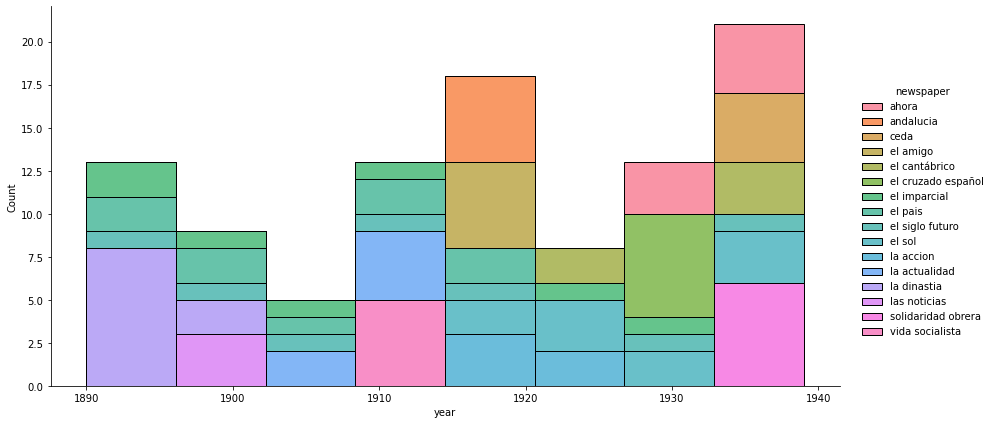

In [15]:
sns.displot(df, x ="year",hue='newspaper', height=6,aspect=2, multiple='stack')

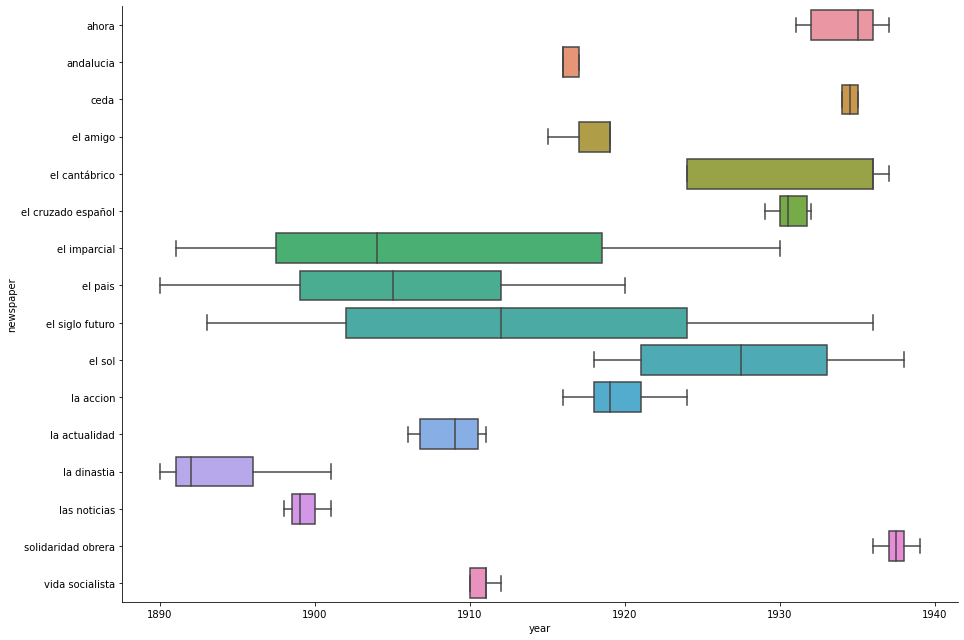

In [16]:
sns.catplot(data=df, x="year", y="newspaper", height=9,aspect=1.5, kind="box")

<font size="3"> Summing up the analysis of our dataset, we can conclude we have discovered interesting tendencies of development and evolution of the Spanish press, which largely coincide with general historical trends, and hopefully will inspire you to continue our research based on our sample representations.   </font>